In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pylab as plt

In [4]:
from solver_python import solve_model

In [112]:
# ===================
#  Model definition
# ===================

# List of nodes:
# named tuple (name, thermal mass, initial T0)
# thermal mass 
Node = namedtuple('Node', ['id', 'mass', 'T0'])
nodes = [Node('one', 0.2,  .2), # id, thermal mass, T(t=0)
         Node('two', 0.3, 0.3)]

# Dictionary of external source:
# {id: 1d array, nbr of time steps, }
# either a temperature (K, °C) or a direct heat source (W)
time = np.linspace(0, 30, 142)
sources = {'ext1':np.sin(time),
           'ext2':np.sin(time/2)}

# Links between nodes (internal):
# thermal conductance W/K
InternalLink = namedtuple('InternalLink',
                          ['node1', 'node2', 'conductance'])
internal_links = [InternalLink('one', 'two', 0.1), ]

# Links between nodes and external temperature
# thermal conductance W/K
# if None, source is a direct heat source (W)
ExternalLink = namedtuple('ExternalLink',
                          ['node', 'source', 'conductance'])
external_links = [ExternalLink('one', 'ext1', 0.5),
                  ExternalLink('two', 'ext2', None)] # ext. second

dt = .1


# run solver
T = solve_model(nodes,
                internal_links,
                external_links,
                sources,
                dt)

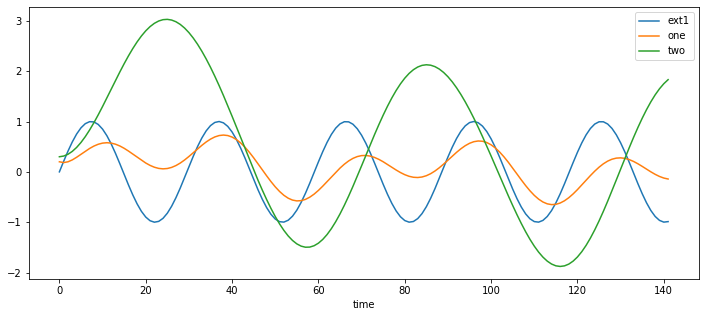

In [114]:
plt.figure(figsize=(12, 5))
plt.plot(sources['ext1'], label='ext1')

for k, (name, _, _) in enumerate(nodes):
    plt.plot(T[k, :], label=name)

plt.legend(); plt.xlabel('time');

In [115]:
from collections import namedtuple

### next

- speed-up
- use auto-diff to get gradient (fiting optimisation)
- use graphvis to draw the model

In [131]:
# sudo apt install graphviz
# !pip install graphviz
# https://github.com/xflr6/graphviz

from graphviz import Graph

graph = Graph(comment='thermal model')

for node in nodes:
    graph.node(node.id, node.id + f' ({node.mass} J/K)',
               shape='rectangle')

for src in sources.keys():
    graph.node(src, src, shape='circle')

    
for link in internal_links:
    graph.edge(link.node1, link.node2, f'{link.conductance} W/K',
               fontsize='9')
    
for link in external_links:
    if link.conductance:
        label = f'{link.conductance} W/K'
    else:
        label = None
    graph.edge(link.node, link.source, label,
              fontsize='9', shape='normal', side='l')

#dot.edges(['AB', 'AL'])
#dot.edge('B', 'L', constraint='false')

graph